# Attorney Involvement Prediction in Claims 

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
df = pd.read_csv('Updated_Claimants_Dataset.csv')

df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


## Exploratory Data Analysis

In [3]:
df.sample(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
465,901,0,NaN,NaN,NaN,NaN,11066.15,Severe,18291.09,0,14003.93,Comprehensive,Minor Offenses
1268,31590,0,0.0,1.0,0.0,50.0,8831.65,Severe,16908.23,1,14533.66,Comprehensive,Clean
906,13380,0,0.0,1.0,0.0,NaN,8476.80,Moderate,14881.41,0,12461.38,Third-Party,Major Offenses
604,5599,0,1.0,1.0,0.0,11.0,13559.57,Minor,17335.01,0,12458.99,Comprehensive,Minor Offenses
785,10048,0,0.0,1.0,0.0,15.0,4611.69,Minor,7248.94,0,6872.41,Comprehensive,Minor Offenses
1004,15693,0,0.0,1.0,0.0,7.0,9390.51,Minor,15783.94,1,12588.69,Third-Party,Clean
17,360,0,0.0,1.0,0.0,58.0,9028.97,Moderate,12670.90,1,11974.43,Third-Party,Major Offenses
755,9480,1,0.0,1.0,0.0,80.0,689.39,Severe,1205.13,1,1027.92,Third-Party,Minor Offenses
300,7748,0,0.0,1.0,0.0,7.0,9684.44,Severe,17494.97,1,16644.23,Third-Party,Major Offenses
833,10537,0,1.0,1.0,0.0,10.0,8605.68,Moderate,16372.42,0,15163.49,Comprehensive,Major Offenses


In [4]:
df.shape

(1340, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


In [6]:
df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


In [7]:
df.describe(include=object)

,Accident_Severity,Policy_Type,Driving_Record
count,1340,1340,1340
unique,3,2,3
top,Minor,Comprehensive,Minor Offenses
freq,465,689,473


In [8]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [9]:
df.isnull().sum()

CASENUM                     0
ATTORNEY                    0
CLMSEX                     12
CLMINSUR                   41
SEATBELT                   48
CLMAGE                    189
LOSS                        0
Accident_Severity           0
Claim_Amount_Requested      0
Claim_Approval_Status       0
Settlement_Amount           0
Policy_Type                 0
Driving_Record              0
dtype: int64

#### Following number of missing values are observed in:-
    
    Claimant Gender (CLMSEX) - 12
    Insured Claimant (CLMINSUR ) - 41
    Calimant with Seatbelt (SEATBELT) - 48
    Claimant Age (CLMAGE) - 189
    
#### Therefore, filling these missing values

In [10]:
df['CLMSEX']=df['CLMSEX'].fillna(df['CLMSEX'].mode()[0])
df['CLMINSUR']=df['CLMINSUR'].fillna(df['CLMINSUR'].mode()[0])
df['SEATBELT']=df['SEATBELT'].fillna(df['SEATBELT'].mode()[0])
df['CLMAGE']=df['CLMAGE'].fillna(df['CLMAGE'].mean())

In [11]:
df.isnull().sum()

CASENUM                   0
ATTORNEY                  0
CLMSEX                    0
CLMINSUR                  0
SEATBELT                  0
CLMAGE                    0
LOSS                      0
Accident_Severity         0
Claim_Amount_Requested    0
Claim_Approval_Status     0
Settlement_Amount         0
Policy_Type               0
Driving_Record            0
dtype: int64

In [12]:
df['CLMSEX'] = df['CLMSEX'].astype(int)
df['CLMINSUR'] = df['CLMINSUR'].astype(int)
df['SEATBELT'] = df['SEATBELT'].astype(int)
df['CLMAGE'] = df['CLMAGE'].astype(int)

In [13]:
print(df.dtypes)

CASENUM                     int64
ATTORNEY                    int64
CLMSEX                      int32
CLMINSUR                    int32
SEATBELT                    int32
CLMAGE                      int32
LOSS                      float64
Accident_Severity          object
Claim_Amount_Requested    float64
Claim_Approval_Status       int64
Settlement_Amount         float64
Policy_Type                object
Driving_Record             object
dtype: object


## Visualization 

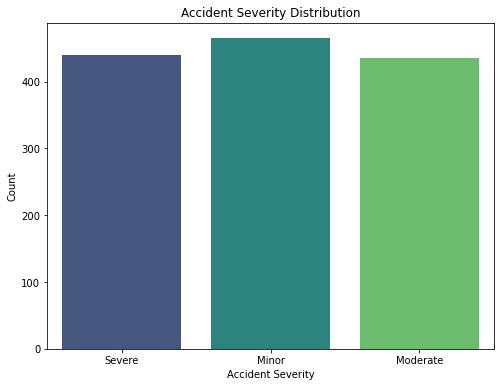

In [14]:
# Bar Chart: Count of Accident_Severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=df, palette='viridis')
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

* The distribution of Accident Severity is almost equal with Minor cases slightly more than other cases.

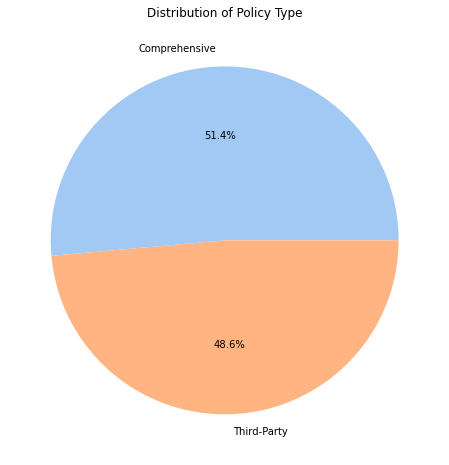

In [15]:
# Pie Chart: Distribution of Policy_Type
plt.figure(figsize=(8, 8))
df['Policy_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Policy Type')
plt.ylabel('')
plt.show()

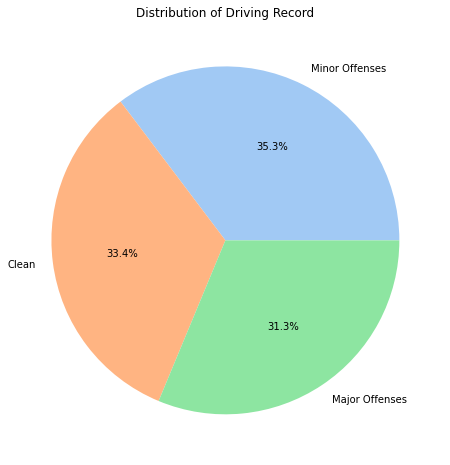

In [16]:
# Pie Chart: Distribution of Driving Record
plt.figure(figsize = (8,8))
df['Driving_Record'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Driving Record')
plt.ylabel('')
plt.show()

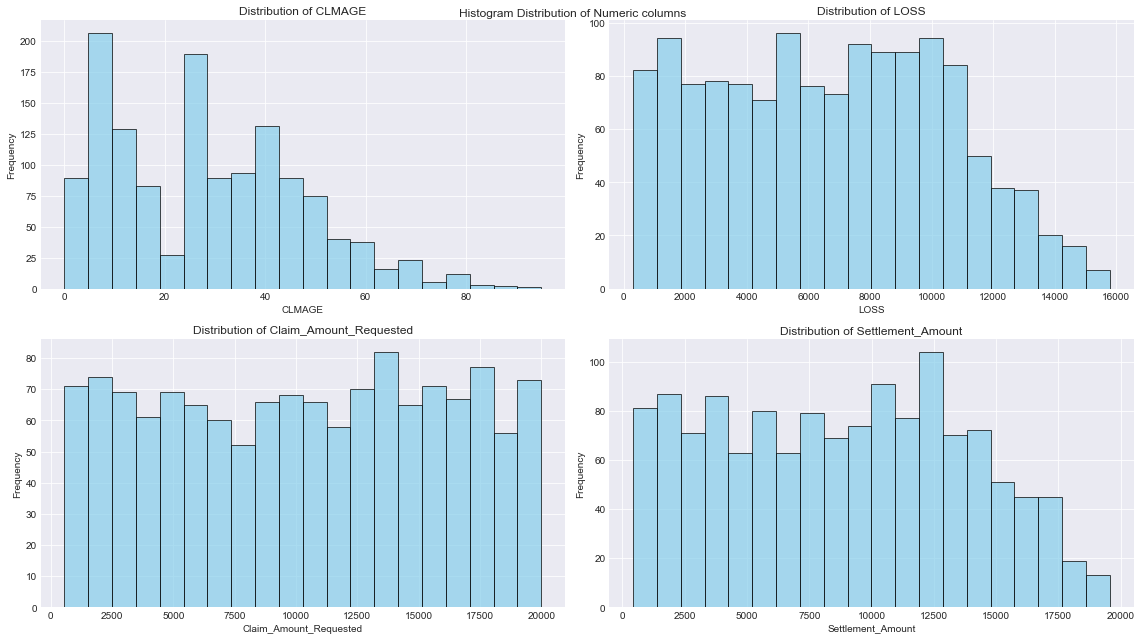

In [17]:
# Histogram of Numeric columns
columns_to_plot = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']


plt.style.use('seaborn-darkgrid')  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9)) 
axes = axes.flatten()

for idx, column in enumerate(columns_to_plot):
    df[column].hist(
        bins=20,  
        ax=axes[idx],  
        color='skyblue',  
        edgecolor='black',  
        alpha=0.7 
    )
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histogram Distribution of Numeric columns')
plt.show()


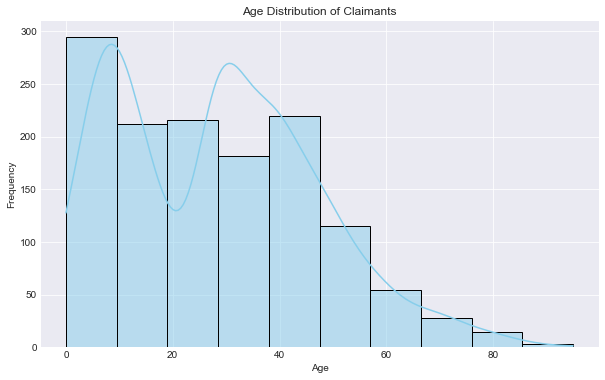

In [18]:
# Histogram: Age Distribution (CLMAGE)
plt.figure(figsize=(10,6))
sns.histplot(df['CLMAGE'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution of Claimants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Right skewness can be observed in CLMAGE.

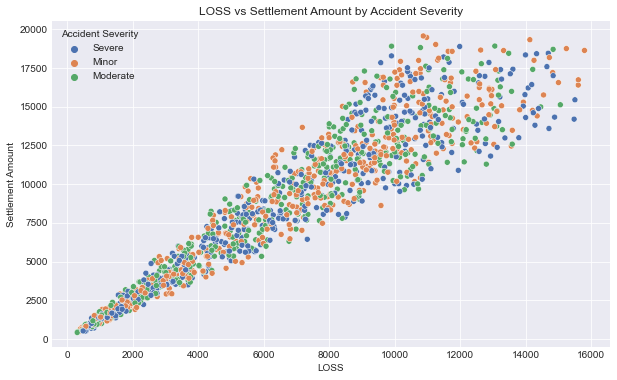

In [19]:
# Scatter Plot: Relationship between LOSS and Settlement_Amount by Accident_Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='LOSS', y='Settlement_Amount', hue='Accident_Severity', data=df, palette='deep', edgecolor='w'
)
plt.title('LOSS vs Settlement Amount by Accident Severity')
plt.xlabel('LOSS')
plt.ylabel('Settlement Amount')
plt.legend(title='Accident Severity')
plt.show()

* Positive Correlation: There is a positive correlation between LOSS and Settlement Amount.

* Severe Accidents: Severe accidents (blue dots) tend to have higher settlement amounts compared to minor (orange dots) and moderate (green dots) accidents.

* Variability: Data points are more spread out at higher LOSS values, indicating greater variability in settlement amounts for higher losses.

* Minor Accidents: Minor accidents are more densely clustered at lower LOSS and settlement amounts.

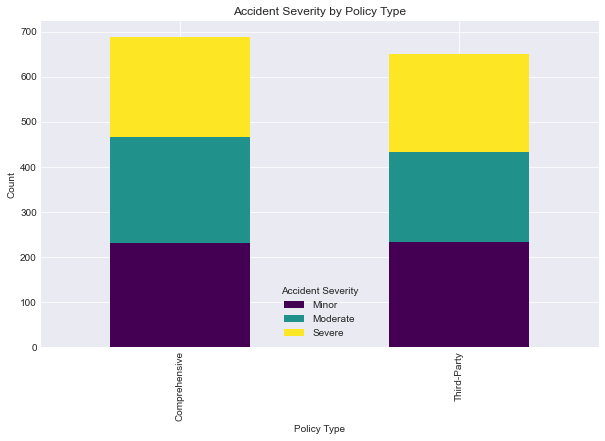

In [20]:
# Stacked Bar Chart: Breakdown of Accident Severity by Policy Type
policy_severity = pd.crosstab(df['Policy_Type'], df['Accident_Severity'])
policy_severity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Accident Severity by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

* Both policy types have a similar total count of accidents.


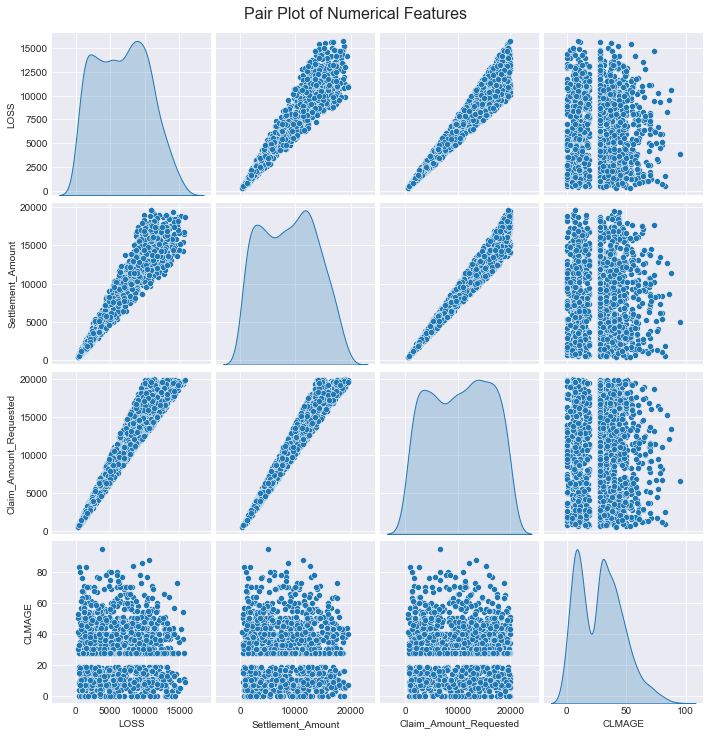

In [21]:
# Pair Plot: Numerical Feature Relationships
pairplot_features = ['LOSS', 'Settlement_Amount', 'Claim_Amount_Requested', 'CLMAGE']
sns.pairplot(df[pairplot_features], diag_kind='kde', palette='pastel')
plt.suptitle('Pair Plot of Numerical Features', fontsize=16, y=1.02)
plt.show()

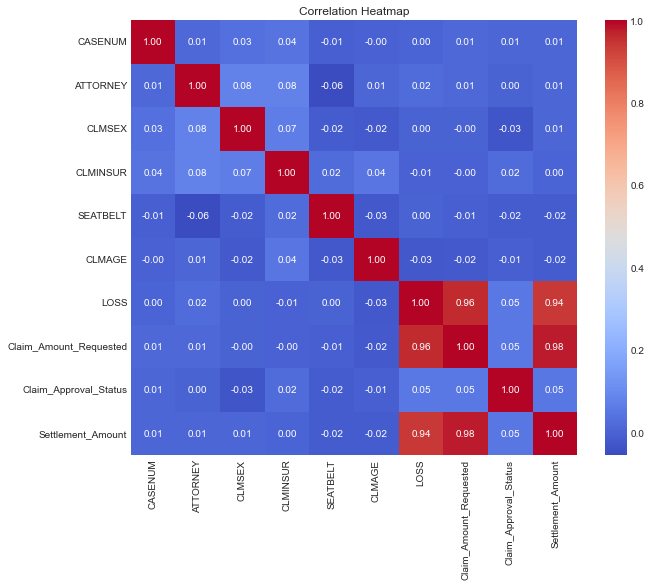

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Key Observations:

Strong Positive Correlations

*   LOSS & Claim_Amount_Requested (0.96)
*   LOSS & Settlement_Amount (0.94)
*   Claim_Amount_Requested & Settlement_Amount (0.98)

## Outlier Analysis 

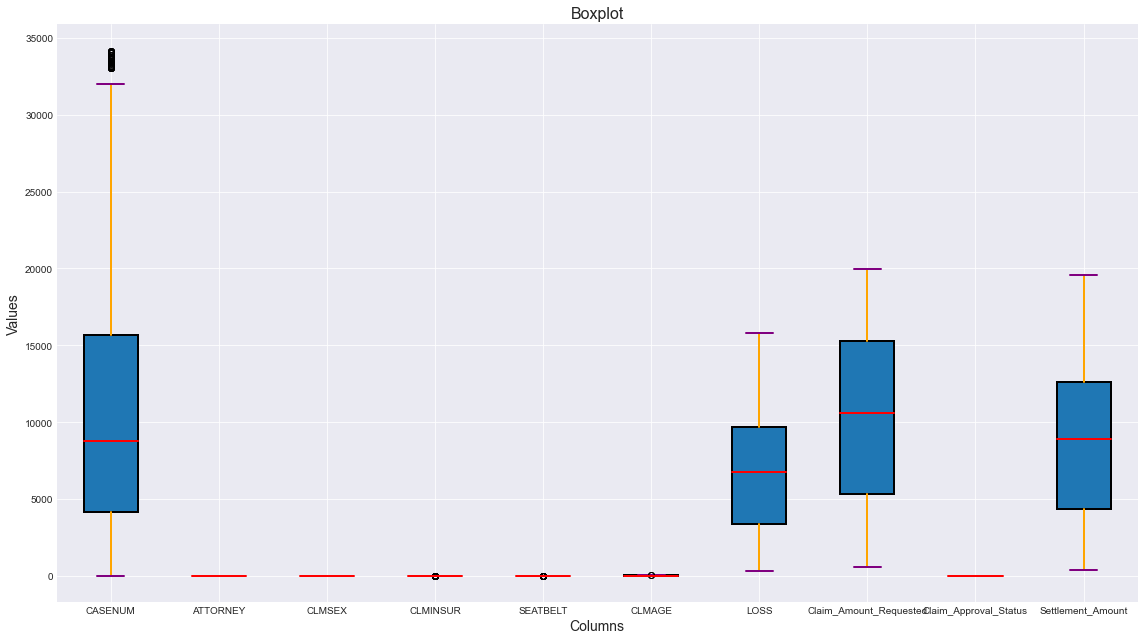

In [23]:
# Boxplot: Identification of Outliers
plt.style.use('seaborn-darkgrid')  
fig, ax = plt.subplots(figsize=(16, 9))

# Create the boxplot with custom colors
boxprops = dict(color='black', linewidth=2)  # Customize box edges
flierprops = dict(marker='o', color='red', alpha=0.8)  # Customize outlier points
medianprops = dict(color='red', linewidth=2)  # Customize median line
whiskerprops = dict(color='orange', linewidth=2)  # Customize whiskers
capprops = dict(color='purple', linewidth=2)  # Customize caps

df.boxplot(
    ax=ax,
    boxprops=boxprops,
    flierprops=flierprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    patch_artist=True,  # Allows filling boxes with color
)

ax.set_title("Boxplot", fontsize=16)
ax.set_xlabel("Columns", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
plt.tight_layout()
plt.show()


* We can see Outliers in CASENUM, CLMINSUR, SEATBELT, CLMAGE columns.

In [24]:
df['CLMINSUR'].value_counts()

1    1220
0     120
Name: CLMINSUR, dtype: int64

In [25]:
df['SEATBELT'].value_counts()

0    1318
1      22
Name: SEATBELT, dtype: int64

* CLMINSUR and SEATBELT have value 0 & 1, in above boxplot we can see that it has shown these values as outliers. So we cannot treat them as outliers.

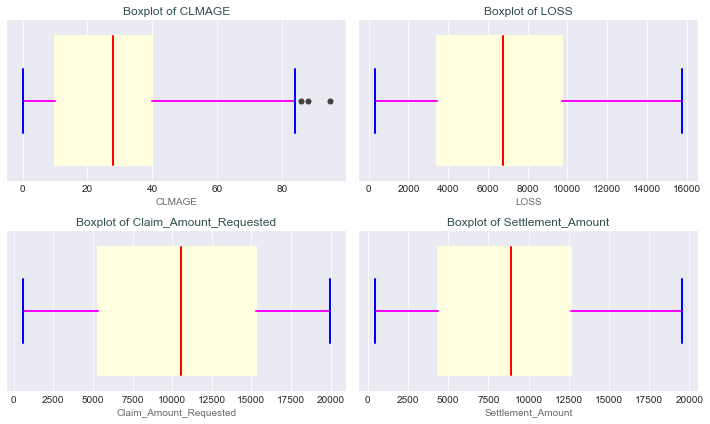

In [26]:
# Checking other columns for outliers
columns_to_check = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1)  # Create subplots in a 2x2 grid
    sns.boxplot(
        x=df[col],
        boxprops=dict(color='lightyellow', linewidth=2),         # Softer box edge color
        flierprops=dict(marker='o', color='green'),  # Stylish red outliers
        medianprops=dict(color='red', linewidth=2),       # Highlighted median line
        whiskerprops=dict(color='magenta', linewidth=2),         # Subtle whisker color
        capprops=dict(color='blue', linewidth=2),        # Cool cap color
    )
    plt.title(f'Boxplot of {col}', fontsize=12, color='darkslategray')  # Modern title font
    plt.xlabel(col, fontsize=10, color='dimgray')                        # Softer x-axis label

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


In [27]:
# Filtering out the outliers

columns = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

# Loop through each numerical column and remove outliers
for col in columns:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

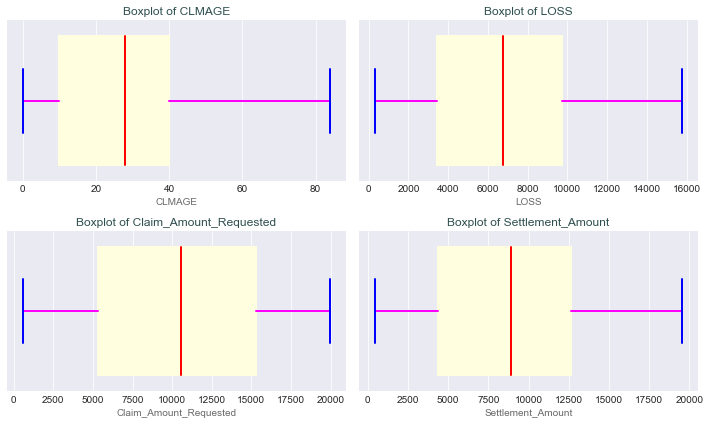

In [28]:
# Checking the columns again for whether the outliers have been cleared
columns_to_check = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1)  # Create subplots in a 2x2 grid
    sns.boxplot(
        x=df[col],
        boxprops=dict(color='lightyellow', linewidth=2),        
        flierprops=dict(marker='o', color='green'),  
        medianprops=dict(color='red', linewidth=2),      
        whiskerprops=dict(color='magenta', linewidth=2),         
        capprops=dict(color='blue', linewidth=2),        
    )
    plt.title(f'Boxplot of {col}', fontsize=12, color='darkslategray')  
    plt.xlabel(col, fontsize=10, color='dimgray')                       

plt.tight_layout()
plt.show()


* Thus the outliers have been filtered.

In [29]:
df['ATTORNEY'].value_counts()

0    684
1    653
Name: ATTORNEY, dtype: int64

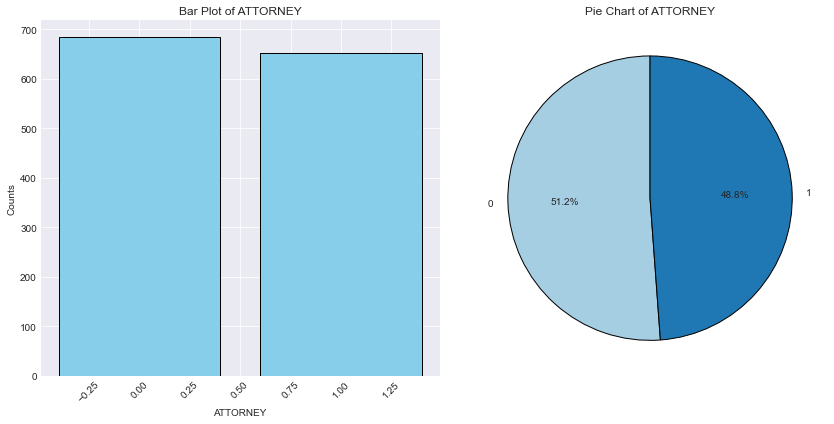

In [30]:
attorney_counts = df['ATTORNEY'].value_counts()

# Set up a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar Plot
axes[0].bar(attorney_counts.index, attorney_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Bar Plot of ATTORNEY', fontsize=12)
axes[0].set_xlabel('ATTORNEY', fontsize=10)
axes[0].set_ylabel('Counts', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)

# Pie Chart
axes[1].pie(
    attorney_counts,
    labels=attorney_counts.index,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,
    colors=plt.cm.Paired.colors,  # Use a color palette
    wedgeprops=dict(edgecolor='black')
)
axes[1].set_title('Pie Chart of ATTORNEY', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [31]:
# Dropping the columns CASENUM
df = df.drop(columns=['CASENUM'])
     

In [32]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,0,0,1,0,50,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,1,1,0,0,18,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,1,0,1,0,5,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,0,0,1,1,31,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,1,0,1,0,30,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


## Encoding  Categorial Variables

In [33]:
df['Accident_Severity'].unique()

array(['Severe', 'Minor', 'Moderate'], dtype=object)

In [34]:
df['Accident_Severity'].value_counts()

Minor       462
Severe      440
Moderate    435
Name: Accident_Severity, dtype: int64

In [35]:
df['Policy_Type'].unique()

array(['Third-Party', 'Comprehensive'], dtype=object)

In [36]:
df['Policy_Type'].value_counts()

Comprehensive    687
Third-Party      650
Name: Policy_Type, dtype: int64

In [37]:
df['Driving_Record'].unique()

array(['Clean', 'Minor Offenses', 'Major Offenses'], dtype=object)

In [38]:
df['Driving_Record'].value_counts()

Minor Offenses    471
Clean             448
Major Offenses    418
Name: Driving_Record, dtype: int64

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Data transformation using Label Encoder - assigns values based on the alphabetical order 
#                                          - the columns which does not follow a natural order - Policy_Type

le = LabelEncoder()
df["Policy_Type"] = le.fit_transform(df["Policy_Type"])

# Data tranfsformation using Ordinal Encoder - for the columns which follow the natural order 
#                                            - Accident_Severity, Driving_Record

oeAS = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Severe']])
df["Accident_Severity"] = oeAS.fit_transform(df[["Accident_Severity"]])
oeDR = OrdinalEncoder(categories=[['Clean', 'Minor Offenses', 'Major Offenses']])
df["Driving_Record"] = oeDR.fit_transform(df[["Driving_Record"]])

df.sample(10)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
558,0,0,1,0,57,7452.15,2.0,11626.89,1,10229.23,0,1.0
25,1,1,1,0,3,13928.36,0.0,17435.13,0,15293.95,1,1.0
504,1,0,1,1,49,10606.50,0.0,14282.16,1,10170.40,0,2.0
947,0,1,1,0,60,5362.07,2.0,9068.40,1,8015.00,0,2.0
1129,1,0,1,0,10,6797.00,0.0,8666.47,1,6472.64,1,0.0
211,1,1,1,0,10,4440.30,0.0,8226.72,0,7581.88,0,1.0
638,0,0,1,0,31,2964.77,1.0,5816.17,1,4669.18,1,0.0
1242,0,0,1,0,46,7472.19,0.0,14764.18,0,12115.61,0,0.0
308,1,1,1,0,36,4518.34,2.0,6810.40,0,6185.10,0,0.0
1207,0,0,1,0,40,2090.44,0.0,3580.12,0,2580.62,1,1.0


## Feature Engineering

In [40]:
# Feature Engineering
df['settlement_ratio'] = df['Settlement_Amount'] / df['Claim_Amount_Requested']
df[['settlement_ratio', 'Settlement_Amount', 'Claim_Amount_Requested']].head()

,settlement_ratio,Settlement_Amount,Claim_Amount_Requested
0,0.716390,3221.74,4497.19
1,0.991923,6166.17,6216.38
2,0.767838,13804.61,17978.55
3,0.791265,596.25,753.54
4,0.791185,1714.83,2167.42


In [41]:
corr_matrix = df.corr()

# Set the correlation threshold (e.g., 0.9 for highly correlated features)
threshold = 0.9

# Find pairs of features with correlation greater than threshold
drop_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            drop_columns.add(colname)

# Drop highly correlated columns
df = df.drop(columns=drop_columns)

print("Dropped columns:", drop_columns)

Dropped columns: {'Claim_Amount_Requested', 'Settlement_Amount'}


In [42]:
print("Data shape after dropping columns:", df.shape)

Data shape after dropping columns: (1337, 11)


In [43]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['ATTORNEY'])  # Drop target column
y = df['ATTORNEY']

X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio
0,0,1,0,50,2367.86,2.0,1,1,0.0,0.716390
1,1,0,0,18,3746.41,0.0,1,0,0.0,0.991923
2,0,1,0,5,14282.43,2.0,0,0,1.0,0.767838
3,0,1,1,31,519.12,2.0,1,0,0.0,0.791265
4,0,1,0,30,1354.31,0.0,0,0,0.0,0.791185


In [44]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [45]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio
0,-1.133786,0.314011,-0.129345,1.170745,-1.139795,1.237763,1.038901,1.028068,-1.215122,-1.540858
1,0.882001,-3.184598,-0.129345,-0.549232,-0.775550,-1.197689,1.038901,-0.972699,-1.215122,1.673764
2,-1.133786,0.314011,-0.129345,-1.247972,2.008308,1.237763,-0.962555,-0.972699,0.027891,-0.940617
3,-1.133786,0.314011,7.731282,0.149509,-1.628274,1.237763,1.038901,-0.972699,-1.215122,-0.667291
4,-1.133786,0.314011,-0.129345,0.095760,-1.407598,-1.197689,-0.962555,-0.972699,-1.215122,-0.668228


In [46]:
# Feature importance analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importance = rf.feature_importances_
feature_names = X.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

print(importances_df)

                 Feature  Importance
4                   LOSS    0.276401
9       settlement_ratio    0.272091
3                 CLMAGE    0.215075
8         Driving_Record    0.056702
5      Accident_Severity    0.056197
6  Claim_Approval_Status    0.033885
7            Policy_Type    0.033770
0                 CLMSEX    0.029908
1               CLMINSUR    0.019003
2               SEATBELT    0.006967


* We can exclude the least important columns - CLMINSUR & SEATBELT

In [47]:
X_trimmed = X_scaled.drop(["CLMINSUR", "SEATBELT"], axis=1)
X_trimmed.head()

,CLMSEX,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio
0,-1.133786,1.170745,-1.139795,1.237763,1.038901,1.028068,-1.215122,-1.540858
1,0.882001,-0.549232,-0.775550,-1.197689,1.038901,-0.972699,-1.215122,1.673764
2,-1.133786,-1.247972,2.008308,1.237763,-0.962555,-0.972699,0.027891,-0.940617
3,-1.133786,0.149509,-1.628274,1.237763,1.038901,-0.972699,-1.215122,-0.667291
4,-1.133786,0.095760,-1.407598,-1.197689,-0.962555,-0.972699,-1.215122,-0.668228


In [48]:
X_FE = X_scaled.copy()

In [49]:
X_FE["CLMINSUR_LOSS"] = X_scaled["CLMINSUR"] * X_scaled["LOSS"]
X_FE["SEATBELT_AccidentSeverity"] = X_scaled["SEATBELT"] * X_scaled["Accident_Severity"]
X_FE.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio,CLMINSUR_LOSS,SEATBELT_AccidentSeverity
0,-1.133786,0.314011,-0.129345,1.170745,-1.139795,1.237763,1.038901,1.028068,-1.215122,-1.540858,-0.357908,-0.160098
1,0.882001,-3.184598,-0.129345,-0.549232,-0.775550,-1.197689,1.038901,-0.972699,-1.215122,1.673764,2.469816,0.154915
2,-1.133786,0.314011,-0.129345,-1.247972,2.008308,1.237763,-0.962555,-0.972699,0.027891,-0.940617,0.630632,-0.160098
3,-1.133786,0.314011,7.731282,0.149509,-1.628274,1.237763,1.038901,-0.972699,-1.215122,-0.667291,-0.511297,9.569499
4,-1.133786,0.314011,-0.129345,0.095760,-1.407598,-1.197689,-0.962555,-0.972699,-1.215122,-0.668228,-0.442002,0.154915


In [50]:
X_FE.drop(["CLMINSUR", "SEATBELT"], axis=1, inplace=True)
X_FE.head()

,CLMSEX,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio,CLMINSUR_LOSS,SEATBELT_AccidentSeverity
0,-1.133786,1.170745,-1.139795,1.237763,1.038901,1.028068,-1.215122,-1.540858,-0.357908,-0.160098
1,0.882001,-0.549232,-0.775550,-1.197689,1.038901,-0.972699,-1.215122,1.673764,2.469816,0.154915
2,-1.133786,-1.247972,2.008308,1.237763,-0.962555,-0.972699,0.027891,-0.940617,0.630632,-0.160098
3,-1.133786,0.149509,-1.628274,1.237763,1.038901,-0.972699,-1.215122,-0.667291,-0.511297,9.569499
4,-1.133786,0.095760,-1.407598,-1.197689,-0.962555,-0.972699,-1.215122,-0.668228,-0.442002,0.154915


In [51]:
X_FE.drop(["LOSS", "Accident_Severity"], axis=1, inplace=True)
X_FE.head()

,CLMSEX,CLMAGE,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio,CLMINSUR_LOSS,SEATBELT_AccidentSeverity
0,-1.133786,1.170745,1.038901,1.028068,-1.215122,-1.540858,-0.357908,-0.160098
1,0.882001,-0.549232,1.038901,-0.972699,-1.215122,1.673764,2.469816,0.154915
2,-1.133786,-1.247972,-0.962555,-0.972699,0.027891,-0.940617,0.630632,-0.160098
3,-1.133786,0.149509,1.038901,-0.972699,-1.215122,-0.667291,-0.511297,9.569499
4,-1.133786,0.095760,-0.962555,-0.972699,-1.215122,-0.668228,-0.442002,0.154915


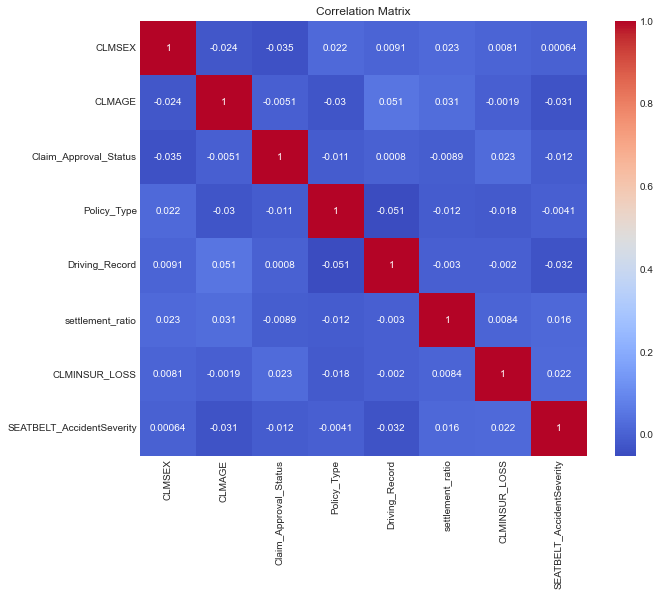

In [52]:
correlation_matrix = X_FE.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
X_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLMSEX                     1337 non-null   float64
 1   CLMAGE                     1337 non-null   float64
 2   Claim_Approval_Status      1337 non-null   float64
 3   Policy_Type                1337 non-null   float64
 4   Driving_Record             1337 non-null   float64
 5   settlement_ratio           1337 non-null   float64
 6   CLMINSUR_LOSS              1337 non-null   float64
 7   SEATBELT_AccidentSeverity  1337 non-null   float64
dtypes: float64(8)
memory usage: 83.7 KB


In [54]:
# Now you can fill the NaN values
X_FE['CLMINSUR_LOSS']=X_FE['CLMINSUR_LOSS'].fillna(X_FE['CLMINSUR_LOSS'].median())
X_FE['SEATBELT_AccidentSeverity']=X_FE['SEATBELT_AccidentSeverity'].fillna(X_FE['SEATBELT_AccidentSeverity'].median())   

In [55]:
X_FE.isnull().sum()

CLMSEX                       0
CLMAGE                       0
Claim_Approval_Status        0
Policy_Type                  0
Driving_Record               0
settlement_ratio             0
CLMINSUR_LOSS                0
SEATBELT_AccidentSeverity    0
dtype: int64

## Model Building 

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_FE, y, test_size=0.2, random_state=42)     

### Logistic Regression 

* - Linear classification model that predicts the probability of a binary outcome using the sigmoid function. The decision boundary is linear, and the output probabilities lie between 0 and 1.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Model training and prediction
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Evaluation
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_log)}")
print(f"Precision: {precision_score(y_test, y_pred_log)}")
print(f"Recall: {recall_score(y_test, y_pred_log)}")
print(f"F1-score: {f1_score(y_test, y_pred_log)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_log)}")
print(classification_report(y_test, y_pred_log))


Model: Logistic Regression
Accuracy: 0.5783582089552238
Confusion Matrix:
[[78 55]
 [58 77]]
Precision: 0.5833333333333334
Recall: 0.5703703703703704
F1-score: 0.5767790262172284
AUC-ROC: 0.5784182678919522
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       133
           1       0.58      0.57      0.58       135

    accuracy                           0.58       268
   macro avg       0.58      0.58      0.58       268
weighted avg       0.58      0.58      0.58       268



### Decision Tree Classifier 

* - Decision Tree splits the dataset into smaller subsets based on feature thresholds, forming a tree structure where each branch represents a decision rule.

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Model training and prediction
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# Evaluation
print("Model: Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtc)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dtc)}")
print(f"Precision: {precision_score(y_test, y_pred_dtc)}")
print(f"Recall: {recall_score(y_test, y_pred_dtc)}")
print(f"F1-score: {f1_score(y_test, y_pred_dtc)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_dtc)}")
print(classification_report(y_test, y_pred_dtc))


Model: Decision Tree Classifier
Accuracy: 0.47388059701492535
Confusion Matrix:
[[68 65]
 [76 59]]
Precision: 0.47580645161290325
Recall: 0.43703703703703706
F1-score: 0.4555984555984556
AUC-ROC: 0.47415761626287944
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       133
           1       0.48      0.44      0.46       135

    accuracy                           0.47       268
   macro avg       0.47      0.47      0.47       268
weighted avg       0.47      0.47      0.47       268



### Random Forest Classifier 

* - Random Forest averages the predictions of multiple decision trees to reduce overfitting and improve generalization.

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Model training and prediction
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Evaluation
print("Model: Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rfc)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rfc)}")
print(f"Precision: {precision_score(y_test, y_pred_rfc)}")
print(f"Recall: {recall_score(y_test, y_pred_rfc)}")
print(f"F1-score: {f1_score(y_test, y_pred_rfc)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_rfc)}")
print(classification_report(y_test, y_pred_rfc))


Model: Random Forest Classifier
Accuracy: 0.5261194029850746
Confusion Matrix:
[[79 54]
 [73 62]]
Precision: 0.5344827586206896
Recall: 0.45925925925925926
F1-score: 0.4940239043824701
AUC-ROC: 0.5266221108326372
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       133
           1       0.53      0.46      0.49       135

    accuracy                           0.53       268
   macro avg       0.53      0.53      0.52       268
weighted avg       0.53      0.53      0.52       268



### Support Vector Classifier 

In [60]:
from sklearn.svm import SVC

# Model training and prediction
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Evaluation
print("Model: Support Vector Machine")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Precision: {precision_score(y_test, y_pred_svc)}")
print(f"Recall: {recall_score(y_test, y_pred_svc)}")
print(f"F1-score: {f1_score(y_test, y_pred_svc)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_svc)}")
print(classification_report(y_test, y_pred_svc))


Model: Support Vector Machine
Accuracy: 0.5298507462686567
Confusion Matrix:
[[63 70]
 [56 79]]
Precision: 0.5302013422818792
Recall: 0.5851851851851851
F1-score: 0.5563380281690141
AUC-ROC: 0.5294346978557505
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       133
           1       0.53      0.59      0.56       135

    accuracy                           0.53       268
   macro avg       0.53      0.53      0.53       268
weighted avg       0.53      0.53      0.53       268



### K - Neighbors Classifier 

* - Makes predictions by finding the k closest data points (neighbors) to the query point and assigning the majority class among them.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Model training and prediction
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

# Evaluation
print("Model: K-Nearest Neighbors")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knc)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knc)}")
print(f"Precision: {precision_score(y_test, y_pred_knc)}")
print(f"Recall: {recall_score(y_test, y_pred_knc)}")
print(f"F1-score: {f1_score(y_test, y_pred_knc)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_knc)}")
print(classification_report(y_test, y_pred_knc))


Model: K-Nearest Neighbors
Accuracy: 0.5149253731343284
Confusion Matrix:
[[72 61]
 [69 66]]
Precision: 0.5196850393700787
Recall: 0.4888888888888889
F1-score: 0.5038167938931297
AUC-ROC: 0.5151211361737678
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       133
           1       0.52      0.49      0.50       135

    accuracy                           0.51       268
   macro avg       0.52      0.52      0.51       268
weighted avg       0.52      0.51      0.51       268



### GaussianNB 

* - GaussianNB is based on Bayes’ theorem, assuming independence among predictors. It calculates the probability of each class given the feature values and selects the class with the highest posterior probability. It assumes that the data is normally distributed (Gaussian distribution) for each feature.

In [62]:
from sklearn.naive_bayes import GaussianNB

# Model training and prediction
nbc = GaussianNB()
nbc.fit(X_train, y_train)
y_pred_nbc = nbc.predict(X_test)

# Evaluation
print("Model: Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nbc)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nbc)}")
print(f"Precision: {precision_score(y_test, y_pred_nbc)}")
print(f"Recall: {recall_score(y_test, y_pred_nbc)}")
print(f"F1-score: {f1_score(y_test, y_pred_nbc)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_nbc)}")
print(classification_report(y_test, y_pred_nbc))


Model: Naive Bayes
Accuracy: 0.5335820895522388
Confusion Matrix:
[[ 14 119]
 [  6 129]]
Precision: 0.5201612903225806
Recall: 0.9555555555555556
F1-score: 0.6736292428198434
AUC-ROC: 0.5304093567251462
              precision    recall  f1-score   support

           0       0.70      0.11      0.18       133
           1       0.52      0.96      0.67       135

    accuracy                           0.53       268
   macro avg       0.61      0.53      0.43       268
weighted avg       0.61      0.53      0.43       268



### XG Boost Classifier

* - XGBoost is an ensemble method based on gradient boosting. It builds trees sequentially, where each tree corrects the errors made by the previous trees.

In [63]:
from xgboost import XGBClassifier

# Model training and prediction
xgbc = XGBClassifier(random_state=42)
xgbc.fit(X_train, y_train)
y_pred_xgbc = xgbc.predict(X_test)

# Evaluation
print("Model: XGBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgbc)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgbc)}")
print(f"Precision: {precision_score(y_test, y_pred_xgbc)}")
print(f"Recall: {recall_score(y_test, y_pred_xgbc)}")
print(f"F1-score: {f1_score(y_test, y_pred_xgbc)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_xgbc)}")
print(classification_report(y_test, y_pred_xgbc))


Model: XGBoost
Accuracy: 0.5149253731343284
Confusion Matrix:
[[73 60]
 [70 65]]
Precision: 0.52
Recall: 0.48148148148148145
F1-score: 0.5
AUC-ROC: 0.5151768309663046
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       133
           1       0.52      0.48      0.50       135

    accuracy                           0.51       268
   macro avg       0.52      0.52      0.51       268
weighted avg       0.52      0.51      0.51       268



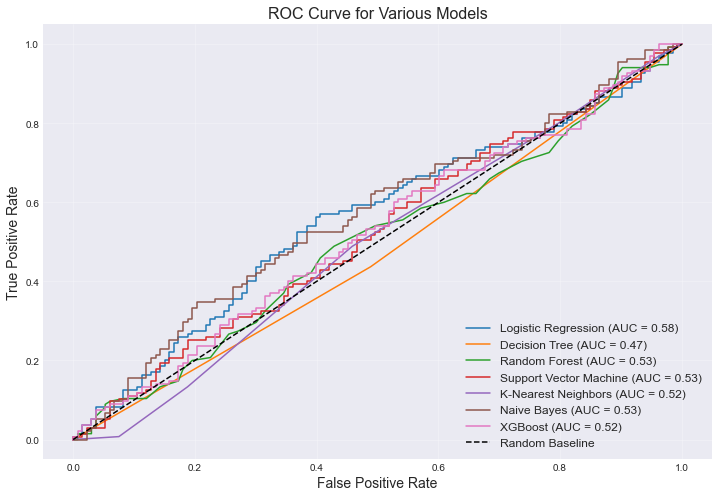

In [64]:
# ROC Curve for all models
plt.figure(figsize=(12, 8))  # Increased figure size for better visibility

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_log):.2f})')

# Decision Tree
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1])
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_pred_dtc):.2f})')

# Random Forest
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_rfc):.2f})')

# Support Vector Machine
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine (AUC = {roc_auc_score(y_test, y_pred_svc):.2f})')

# K-Nearest Neighbors
fpr_knc, tpr_knc, _ = roc_curve(y_test, knc.predict_proba(X_test)[:, 1])
plt.plot(fpr_knc, tpr_knc, label=f'K-Nearest Neighbors (AUC = {roc_auc_score(y_test, y_pred_knc):.2f})')

# Naive Bayes
fpr_nbc, tpr_nbc, _ = roc_curve(y_test, nbc.predict_proba(X_test)[:, 1])
plt.plot(fpr_nbc, tpr_nbc, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_pred_nbc):.2f})')

# XGBoost
fpr_xgbc, tpr_xgbc, _ = roc_curve(y_test, xgbc.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgbc, tpr_xgbc, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_pred_xgbc):.2f})')

# Random Baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline')

# Customizing the plot
plt.title('ROC Curve for Various Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [65]:
from sklearn.model_selection import cross_val_score

# Define models in a dictionary for easy iteration
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Perform cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  
    print(f"{model_name} - Cross-validated accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Logistic Regression - Cross-validated accuracy: 0.53 ± 0.02
Decision Tree - Cross-validated accuracy: 0.51 ± 0.03
Random Forest - Cross-validated accuracy: 0.50 ± 0.03
SVM - Cross-validated accuracy: 0.52 ± 0.01
K-Nearest Neighbors - Cross-validated accuracy: 0.49 ± 0.02
Naive Bayes - Cross-validated accuracy: 0.52 ± 0.01


## Hyper Parameter Tuning 

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest and Logistic Regression
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength for Logistic Regression
    'solver': ['liblinear', 'lbfgs'],  # Solver options
    'max_iter': [100, 200, 300]
}

# Perform GridSearchCV for Random Forest
grid_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Perform GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(estimator=logreg, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}


In [67]:
# Train the models with best hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=42)

In [68]:
best_lr = LogisticRegression(
    C=0.1,
    max_iter=100,
    solver='lbfgs',
    random_state=42
)
best_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42)

In [69]:
# Evaluate the models
y_pred_rf = best_rf.predict(X_test)
y_pred_lr = best_lr.predict(X_test)

Model: Random Forest (Tuned)
Accuracy: 0.5000
Confusion Matrix:
[[75 58]
 [76 59]]
Precision: 0.5043
Recall: 0.4370
F1-score: 0.4683
AUC-ROC: 0.5005
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       133
           1       0.50      0.44      0.47       135

    accuracy                           0.50       268
   macro avg       0.50      0.50      0.50       268
weighted avg       0.50      0.50      0.50       268

Model: Logistic Regression (Tuned)
Accuracy: 0.5784
Confusion Matrix:
[[79 54]
 [59 76]]
Precision: 0.5846
Recall: 0.5630
F1-score: 0.5736
AUC-ROC: 0.5785
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       133
           1       0.58      0.56      0.57       135

    accuracy                           0.58       268
   macro avg       0.58      0.58      0.58       268
weighted avg       0.58      0.58      0.58       268



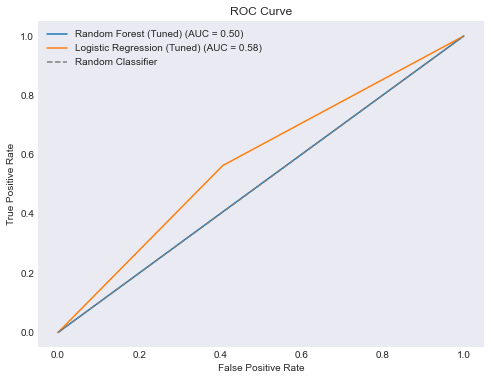

In [70]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred):.2f})')
    
# Initialize plot
plt.figure(figsize=(8, 6))

# Evaluate models
evaluate_model(y_test, y_pred_rf, 'Random Forest (Tuned)')
evaluate_model(y_test, y_pred_lr, 'Logistic Regression (Tuned)')

# Plot formatting
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


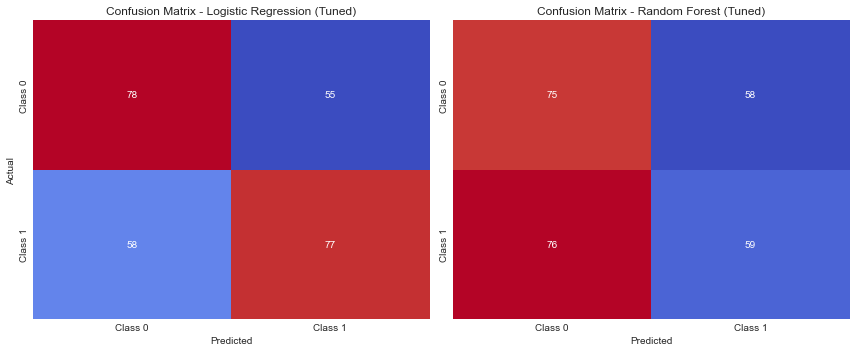

In [71]:
# Function to plot confusion matrices
def plot_confusion_matrices(y_true, y_pred1, y_pred2, model_name1, model_name2):
    cm1 = confusion_matrix(y_true, y_pred1)
    cm2 = confusion_matrix(y_true, y_pred2)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create subplots (1 row, 2 columns)
    
    # Plot for Model 1
    sns.heatmap(cm1, annot=True, fmt="d", cmap="coolwarm", cbar=False, ax=axes[0],
                xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    axes[0].set_title(f'Confusion Matrix - {model_name1}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Plot for Model 2
    sns.heatmap(cm2, annot=True, fmt="d", cmap="coolwarm", cbar=False, ax=axes[1],
                xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    axes[1].set_title(f'Confusion Matrix - {model_name2}')
    axes[1].set_xlabel('Predicted')
    
    plt.tight_layout()
    plt.show()

# Call function with two models
plot_confusion_matrices(y_test, y_pred_log, y_pred_rf, "Logistic Regression (Tuned)", "Random Forest (Tuned)")


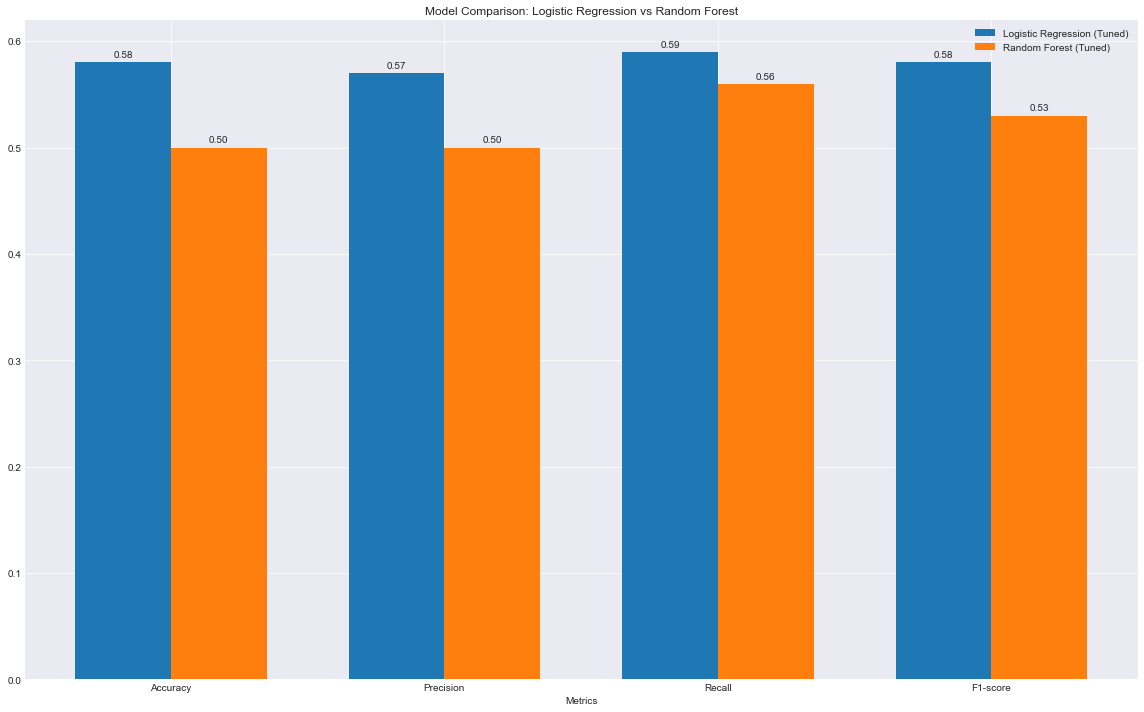

In [72]:
# Metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lr_scores = [0.58, 0.57, 0.59, 0.58]
rf_scores = [0.50, 0.50, 0.56, 0.53]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 10))

# Plotting the bars for both models
rects1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression (Tuned)')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest (Tuned)')

# Adding labels, title and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_title('Model Comparison: Logistic Regression vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding the scores on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

# Show the plot
plt.tight_layout()
plt.show()


**Conclusion:** After evaluating multiple classification models, Logistic Regression (Tuned) was selected for deployment based on its overall performance. Although the model's accuracy is relatively modest at 0.58, the F1-score of 0.58 strikes a balance between precision and recall, making it suitable for the task of predicting attorney involvement in insurance claims.

## Saving the Model 

In [73]:
import pickle

# Train the best Logistic Regression model
best_lr.fit(X_train, y_train)  

# Save the trained model to a pickle file
model_filename = 'logistic_regression_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_lr, f)

print(f"Model saved successfully as {model_filename}")


Model saved successfully as logistic_regression_model.pkl


In [74]:
print(type(best_lr))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [75]:
print(best_lr.feature_names_in_)

['CLMSEX' 'CLMAGE' 'Claim_Approval_Status' 'Policy_Type' 'Driving_Record'
 'settlement_ratio' 'CLMINSUR_LOSS' 'SEATBELT_AccidentSeverity']
